In [46]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import itertools
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
import scipy
import scipy.sparse.linalg
import scipy.linalg
import scipy.sparse
from twoD_tool import *

L = 4
mean_ = [0.0, 0.02, 0.05, 0.1, 0.2]
bond_dim_ = [2, 5, 10]
dtype = "float64"   #dtype of the peps, float64 or complex128
for mean in mean_:
    for bond_dim in bond_dim_:
        peps = qtn.PEPS.rand(Lx = L, Ly = L, dtype=dtype, bond_dim=bond_dim, seed=2)
        for tensor in peps.tensors:
            data = tensor.data
            data += mean
        prob = peps.contract(all, optimize='auto-hq')
        prob_exact = np.real(prob.data.conj()*prob.data)
        norm = prob_exact.sum()
        prob_exact = prob_exact/norm
        mean_corr, var_corr = correlation_all(prob_exact, L)
        cmi = cmi_(prob_exact, L)
        cmi_all = cmi_traceout(prob_exact, L)

        np.save("result/random_peps/cmi_random_peps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", cmi)
        np.save("result/random_peps/mean_corr_random_peps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", mean_corr)
        np.save("result/random_peps/var_corr_random_peps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", var_corr)
        np.save("result/random_peps/cmi_traceout_random_peps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", cmi_all)


[[0.37158901919562237, 0.43078276782264013, 0.42436705102359173, 0.4951986568947101, 0.4956771639439381, 0.4638124158173942, 0.361812455278983, 0.3200844333638983, 0.4928627108538048, 0.4820206794385137, 0.38044878904520163, 0.45017871671448695, 0.4918103693843697, 0.49730907438827504, 0.4850795412434547, 0.4611221973540607], [-0.28048917740694806, 0.03260584768209693, -0.08229786602292283, 0.0541146299422854, 0.07598444041602057, 0.08171999748768999, 0.1821355969953236, -0.07148307994404322, 0.2784632464284252, -0.03413902621959039, 0.09790828498436771, -0.1719980448382603, 0.035683349895408334, -0.011935610768336935, -0.034349094035255226, -0.5578167826074962, -0.019625438543245152, 0.004049643097843737, 0.27691492846417687, 0.058766450666664374, -0.003780508590003534, -0.19860224069990495, 0.044328232592924635, 0.03932078627297331], [0.0001471836055260134, -0.08250306032202956, 0.0017371890048579058, 0.06000108060532876, -0.05719356652602775, 0.014352776536669054, 0.0791128779548433

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


[[0.49679965096647616, 0.4998389132205405, 0.4948881402854391, 0.463651479572599, 0.49857268466250915, 0.49960930846786417, 0.49410605040180666, 0.49168276006261974, 0.4982649512697225, 0.49929987561899675, 0.4996875439906955, 0.4976896871193722, 0.48951503058179474, 0.49836360606661156, 0.4999311320620982, 0.45259549448119596], [0.08374279113529895, -0.010854764322491222, 0.0382729471758117, -0.02566412003847322, 0.007760983993702727, -0.0013810877169182605, 0.052767647282475565, -0.0077038013122504995, 0.046821154237808686, -0.010881688798401729, 7.389969125033962e-05, -0.0010803721356891418, 0.0344163703808218, -0.051518069218186385, -0.10846553893157615, 0.05375961993555101, -0.0003445332784412688, 0.030889815621246472, 0.013238845363016042, -0.011454476634348667, -0.08057039217328532, 0.05284197110515165, -0.023829125343594604, -0.06058062118548747], [-0.03198704722046126, -0.0080184397347363, -0.025112701451108107, 0.02043478085145066, 0.004593583920584126, -0.0066925763672012716

In [37]:
cmi = {}
mean_corr = {}
var_corr = {}
cmi_traceout = {}

# Looping through the values and loading each file
for m in mean_:
    for b in bond_dim_:
        filename = f"result/random_peps/cmi_random_peps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        cmi[m, b] = np.load(filename)
        filename = f"result/random_peps/mean_corr_random_peps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        mean_corr[m, b] = np.load(filename)
        mean_corr[m, b] = np.abs(mean_corr[m, b])
        filename = f"result/random_peps/var_corr_random_peps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        var_corr[m, b] = np.load(filename)
        filename = f"result/random_peps/cmi_traceout_random_peps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        cmi_traceout[m, b] = np.load(filename, allow_pickle=True)


In [38]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[[] for j in  range (len(bond_dim_))]for i in range (len(mean_)) ]
err_cmi_length_traceout = [[[] for j in  range (len(bond_dim_)) ]for i in range (len(mean_))]

for i in mean_:
    for b in bond_dim_:
        df = len(cmi[i, b])-2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i ,b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i, b])) - mean_x)**2))
        cmi_length.append(cmi_len)
        err_cmi_length.append(err)

        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i, b])), -np.log(mean_corr[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i, b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i, b])) - mean_x)**2))
        corre_length.append(corr_len)
        err_corre_length.append(err)

        for j in range(len(cmi_traceout[i, b])):
            df = len(cmi_traceout[i, b][j])-2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i, b][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i, b][j])) - mean_x)**2))
            cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(cmi_len)
            err_cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(err)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:11: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:25: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:25: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)


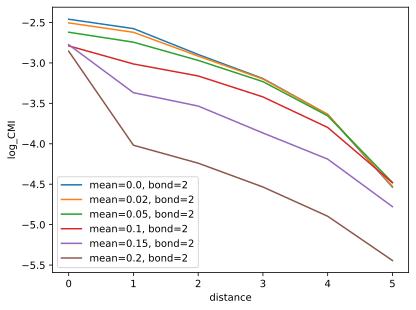

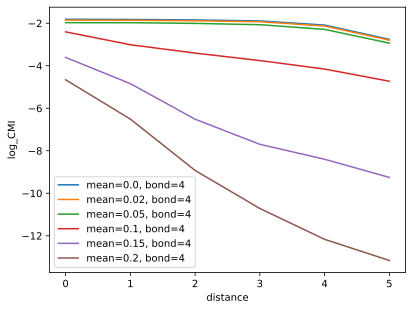

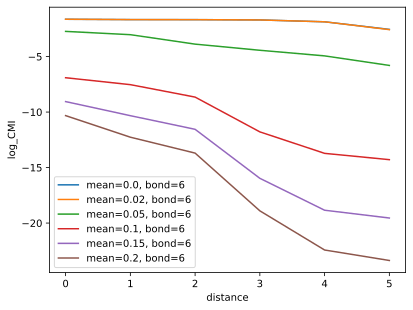

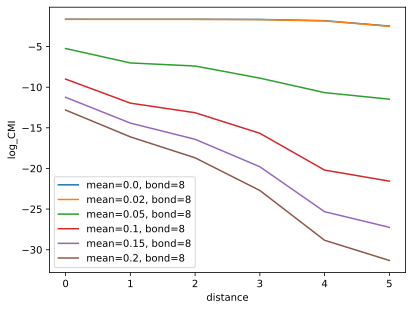

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


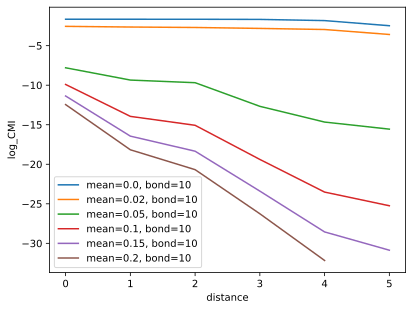

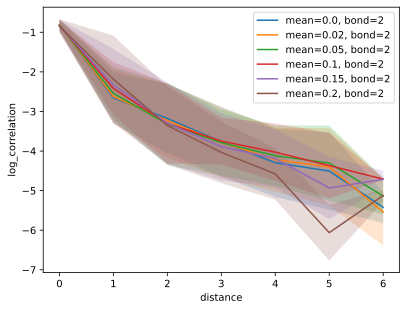

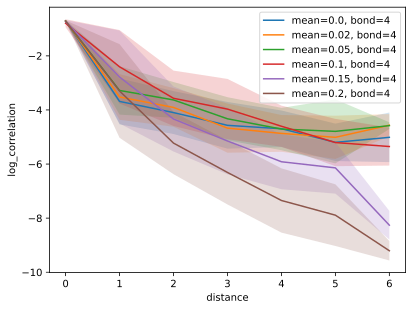

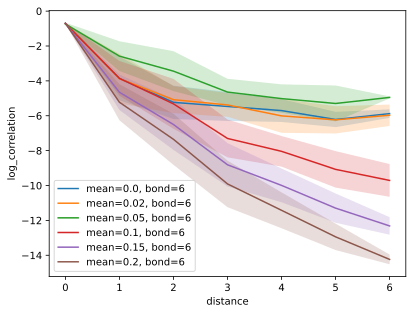

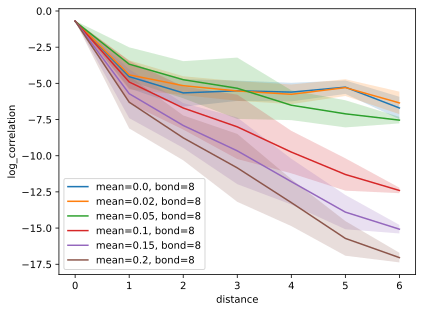

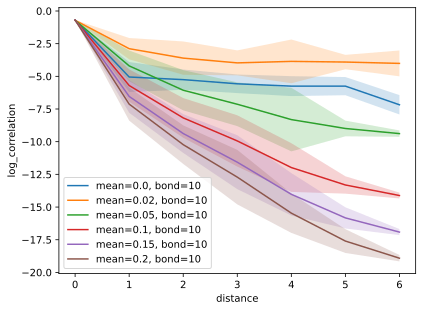

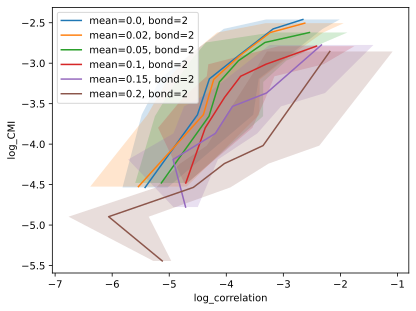

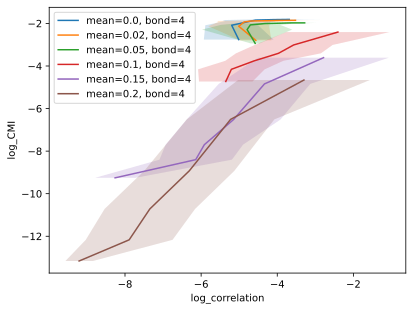

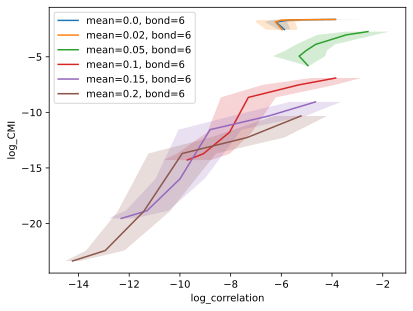

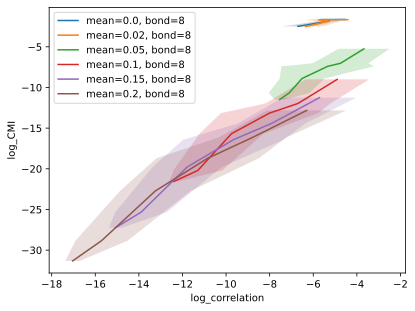

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)


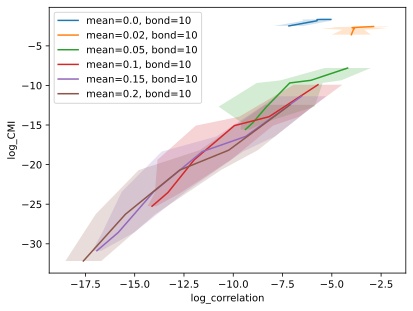

<Figure size 640x480 with 0 Axes>

In [40]:
for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/cmi_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_cmi_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



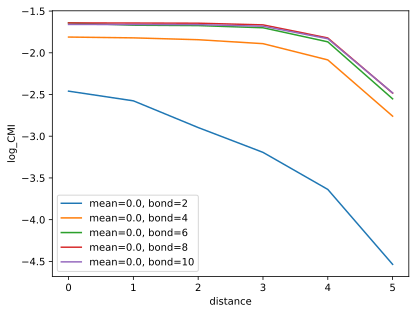

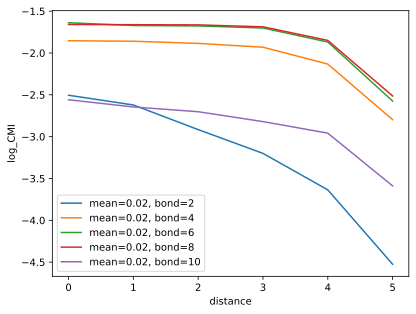

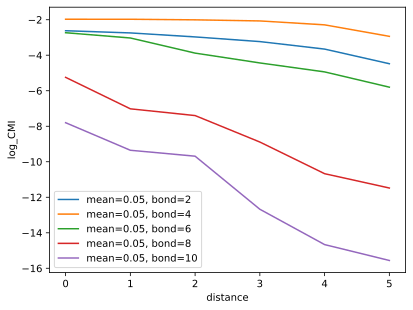

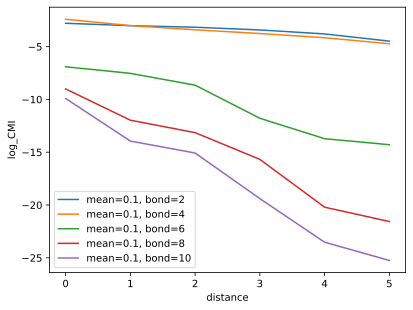

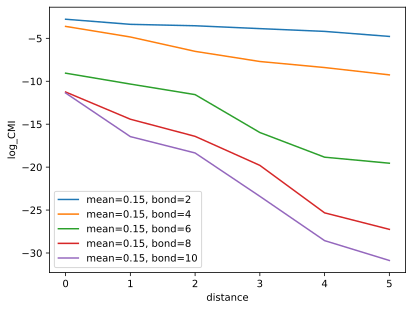

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


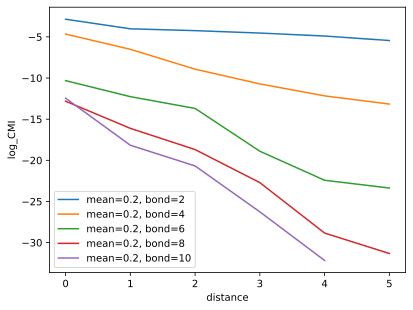

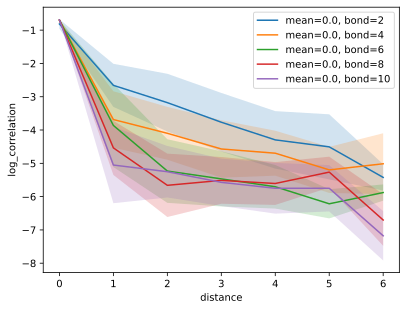

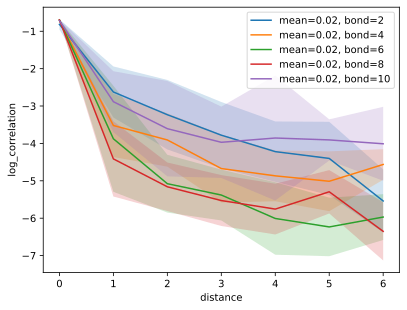

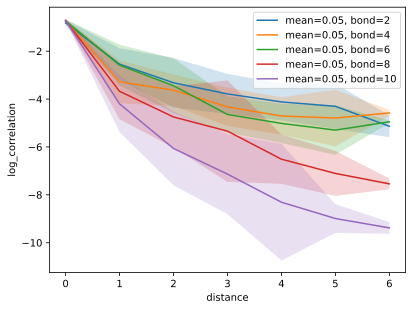

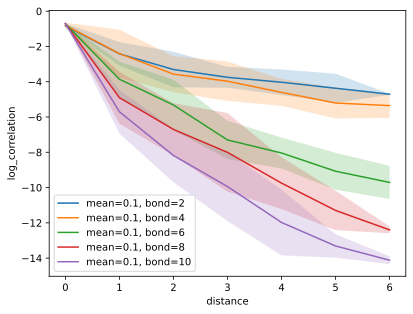

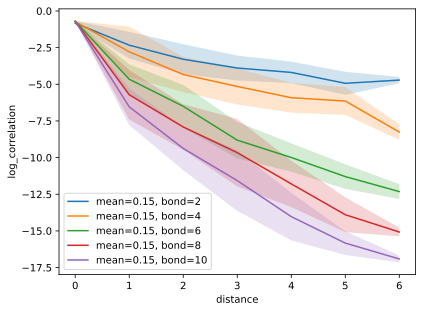

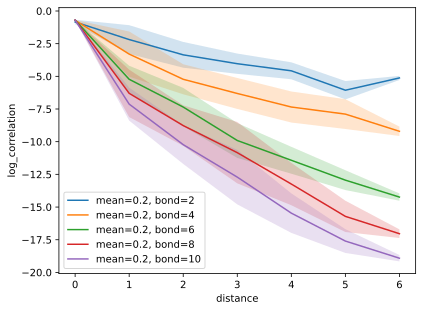

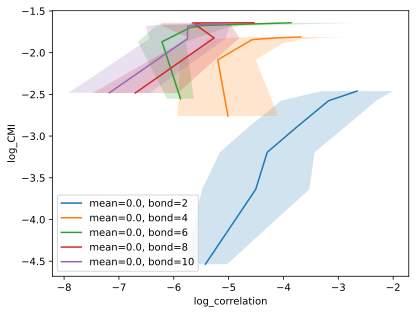

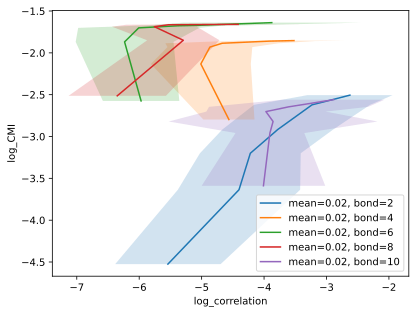

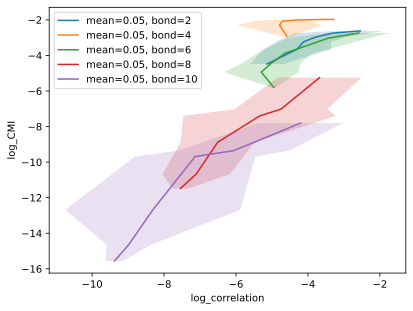

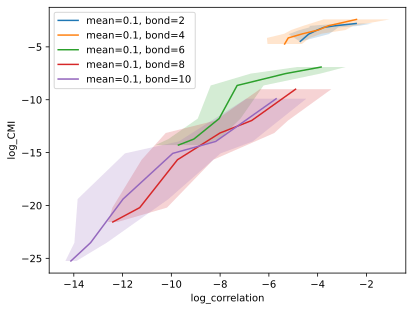

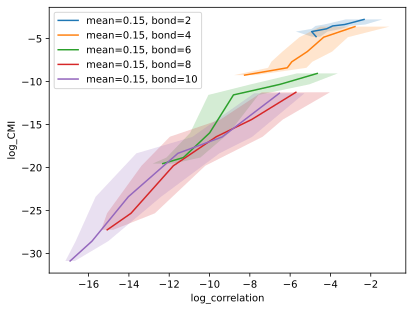

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)


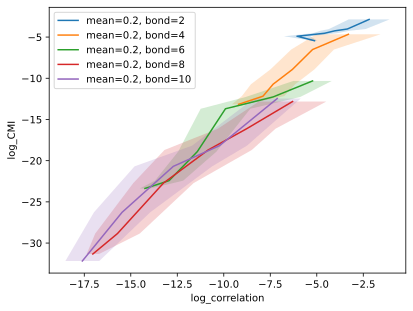

<Figure size 640x480 with 0 Axes>

In [42]:
for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/cmi_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_cmi_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



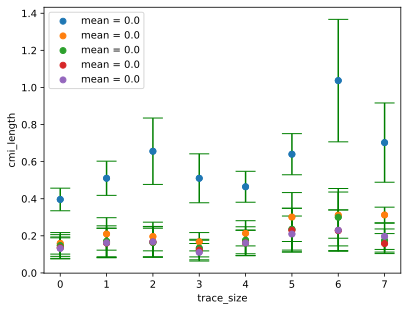

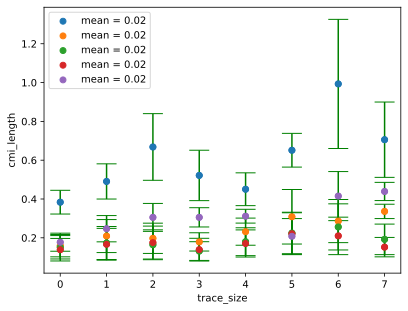

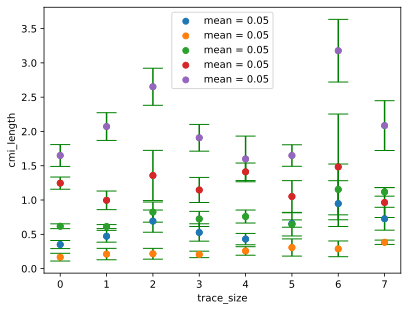

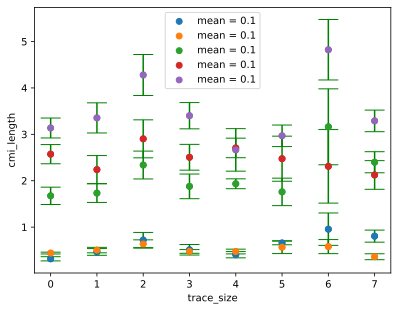

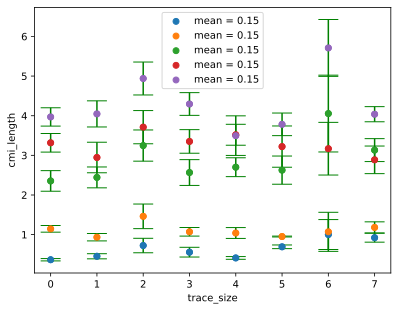

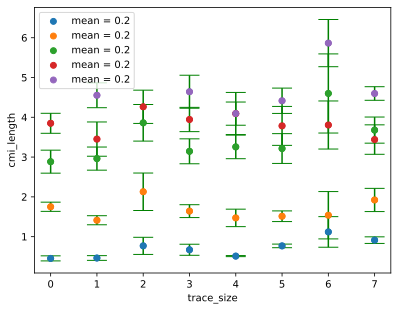

<Figure size 640x480 with 0 Axes>

In [29]:
for i in range(len(mean_)):
    for j in range(len(bond_dim_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label="mean = "+str(mean_[i]) + ", bond = "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_peps/traceout/cmi_length_traceout_random_peps_L"+str(L)+"mean="+str(i)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

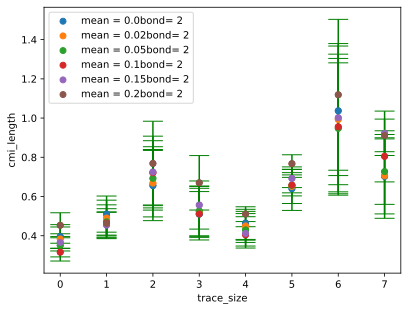

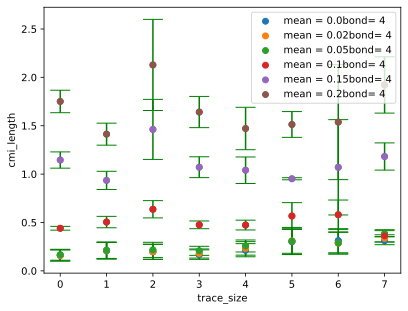

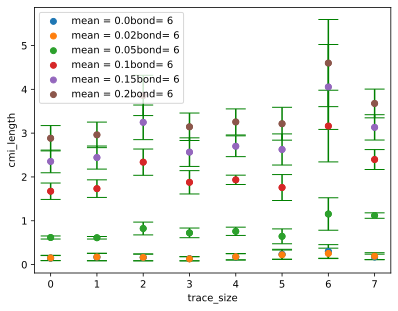

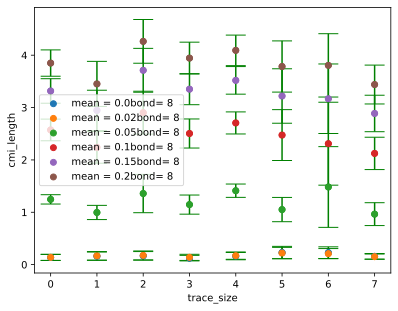

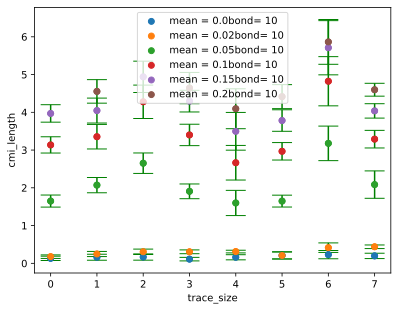

<Figure size 640x480 with 0 Axes>

In [44]:
for j in range(len(bond_dim_)):
    for i in range(len(mean_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label= "mean = "+str(mean_[i])+", bond= "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_peps/traceout/cmi_length_traceout_random_peps_L"+str(L)+"_bond_dim="+str(j)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()